# Stock Prediction Model using GRU

## Libraries used
- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical computations.
- `matplotlib.pyplot`: For plotting graphs and visualizations.
- `keras`: For building and training the neural network.
  - `Sequential`: For creating a sequential model.
  - `Dense`: For fully connected (dense) layers.
  - `Dropout`: For dropout layers to prevent overfitting.
  - `GRU`: For GRU layers (Gated Recurrent Unit).
  - `BatchNormalization`: For batch normalization layers to stabilize and accelerate training.
  - `Input`: For specifying the input shape.
  - `Adam`: For the Adam optimizer.
  - `EarlyStopping`: For stopping training early if the model stops improving.
- `sklearn.preprocessing`: For feature scaling.
  - `RobustScaler`: For scaling features to make the model more robust to outliers.

## Process of Loading the Data
1. **Load dataset**: The dataset is read from a CSV file using `pandas`.
2. **Remove NaN values**: Rows with NaN values in the 'Open' or 'Close' columns are removed.
3. **Calculate % Momentum**: A new feature, % Momentum, is calculated based on the 'Close' prices over a 7-day period.
4. **Calculate Daily Returns**: Daily returns are calculated.
5. **Calculate Volatility**: Volatility is calculated as the rolling standard deviation of returns over a 10-day window.
6. **Prepare data**: The relevant columns ('Open', 'Close', '% Momentum', 'Volatility') are selected, and the 'Date' column is converted to datetime format and set as the index.
7. **Feature Scaling**: The data is scaled using `RobustScaler`.
8. **Split data into training and test sets**: The data is split into training and test sets.
9. **Create sequences**: Sequences and labels are created using a time step of 10.

## GRU Model Architecture

### Layers:
1. **Input Layer:**
   - **Layer Type:** GRU
   - **Units:** 64
   - **Return Sequences:** True (The layer returns the full sequence)
   - **Input Shape:** (time_step, number_of_features) which in this case is (10, 4)

2. **Dropout Layer:**
   - **Dropout Rate:** 0.2 (20% of the units are dropped during training)

3. **Hidden Layer:**
   - **Layer Type:** GRU
   - **Units:** 64
   - **Return Sequences:** False (The layer returns the last output in the output sequence)

4. **Dropout Layer:**
   - **Dropout Rate:** 0.2 (20% of the units are dropped during training)

5. **Output Layer:**
   - **Layer Type:** Dense
   - **Units:** 4 (Corresponding to the 4 features being predicted: Open, Close, % Momentum, Volatility)

### Model Compilation:
- **Optimizer:** Adam
- **Loss Function:** Mean Squared Error (MSE)


## Training Parameters
- **Number of Epochs**: 500 (but training can stop early if the model stops improving due to early stopping).
- **Batch Size**: 64
- **Early Stopping**: The training will stop early if the loss does not improve for 10 consecutive epochs, and the best weights will be restored.
- **shuffle=False**: improves the prediction.


C:\Users\iamha\AppData\Local\Temp\ipykernel_6544\3490541401.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['% Momentum'].fillna(0, inplace=True)
C:\Users\iamha\AppData\Local\Temp\ipykernel_6544\3490541401.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Train sequences shape: (8439, 10, 4)
Train labels shape: (8439, 4)


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.4344
Epoch 2/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2680
Epoch 3/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2113
Epoch 4/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1947
Epoch 5/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1705
Epoch 6/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1559
Epoch 7/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1460
Epoch 8/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1494
Epoch 9/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1455
Epoch 10/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1313
Epoch 11/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1320
Epoch 12/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1280
Epoch 13/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1311
Epoch 14/500
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1197
Epoch 15/500
132/132 ━━━━━━━

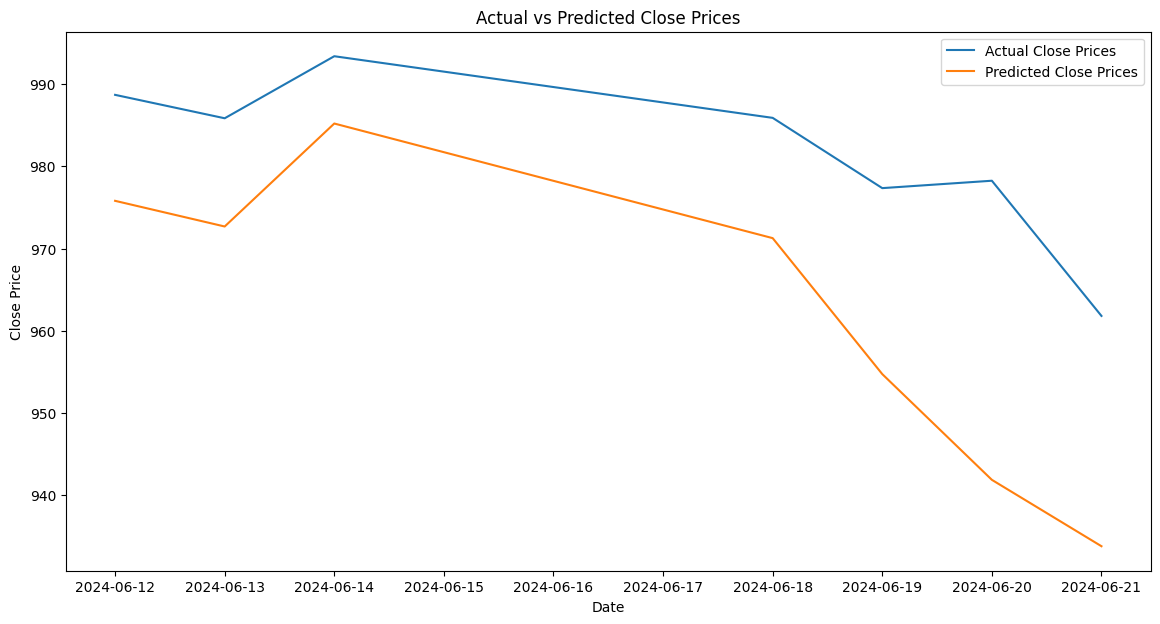

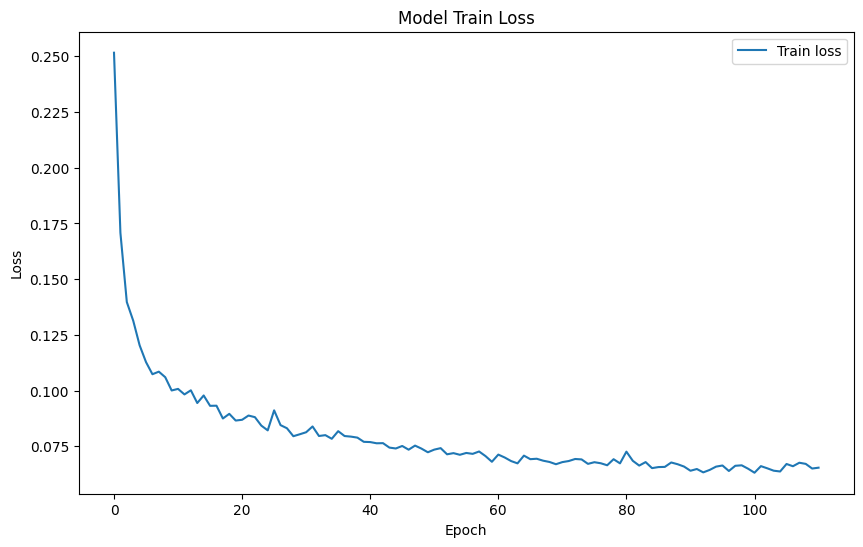

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, BatchNormalization, Input
from keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv("TATAMOTORS.NS2.csv")

# Remove rows with NaN values in 'Open' or 'Close' columns
df = df.dropna(subset=['Open', 'Close'])

# Calculate % Momentum feature
n = 7  # Number of days for momentum calculation
df['% Momentum'] = (df['Close'].diff(n) / df['Close'].shift(n)) * 100  # % Momentum

# Handle NaN values in % Momentum
df['% Momentum'].fillna(0, inplace=True)

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Calculate rolling standard deviation of returns as volatility
volatility_window = 10  # Adjust the window size as needed
df['Volatility'] = df['Returns'].rolling(window=volatility_window).std()

# Handle NaN values in Volatility
df['Volatility'].fillna(df['Volatility'].mean(), inplace=True)

# Prepare data including % Momentum and Volatility features
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close', '% Momentum', 'Volatility']]

# Feature Scaling with adjusted range for RobustScaler
sc = RobustScaler()
data_scaled = sc.fit_transform(data)

# Define a smaller time_step
time_step = 10
length = len(data_scaled)

# Split the data into training and test sets
train_data = data_scaled[:length-7]
test_data = data_scaled[length-7:length]

# Function to create sequences
def create_sequence(dataset, time_step):
    sequences = []
    labels = []
    for start_idx in range(len(dataset) - time_step):
        end_idx = start_idx + time_step
        sequences.append(dataset[start_idx:end_idx])
        labels.append(dataset[end_idx])
    return np.array(sequences), np.array(labels)

# Create sequences with time step
X_train, y_train = create_sequence(train_data, time_step)
X_test, y_test = create_sequence(test_data, time_step)

# Check shapes of the sequences and labels
print(f"Train sequences shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")

# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    
    model.add(Dropout(0.2))
    # Hidden layer
    model.add(GRU(units=units))
    
    model.add(Dropout(0.2))
    model.add(Dense(units=4))  # Adjust output units as needed
    # Compile model
    model.compile(optimizer='adam', loss='mse')
    return model


model_gru = create_gru(64)

# Fit model
def fit_model(model):
    early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=500, batch_size=64, shuffle=False, callbacks=[early_stop])
    return history

history_gru = fit_model(model_gru)

# Make predictions for the next 30 days
predictions = []
input_seq = train_data[-time_step:].reshape(1, time_step, X_train.shape[2])

for _ in range(7):
    predicted = model_gru.predict(input_seq)
    predictions.append(predicted[0])
    input_seq = np.append(input_seq[:, 1:, :], predicted.reshape(1, 1, X_train.shape[2]), axis=1)

# Inverse transform the predictions
predictions = np.array(predictions)
predictions_inverse = sc.inverse_transform(predictions)

# Extract the actual last 30 days data
actual_last_7_days = data[length-7:length]

# Create a DataFrame for the predicted data
predicted_dates = actual_last_7_days.index  # Use the same dates as the actual data
predicted_df = pd.DataFrame(predictions_inverse, index=predicted_dates, columns=['Predicted_Open', 'Predicted_Close', 'Predicted_%_Momentum', 'Predicted_Volatility'])

# Plot actual vs predicted close prices
plt.figure(figsize=(14, 7))
plt.plot(actual_last_7_days['Close'], label='Actual Close Prices')
plt.plot(predicted_df['Predicted_Close'], label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot loss function
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train loss')
    plt.title('Model Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

plot_loss(history_gru)


In [65]:
from sklearn.metrics import mean_absolute_error  # Import mean_absolute_error
# Assuming `predicted_df` is a DataFrame with 'Predicted_Open' column
predicted_open_values = predicted_df['Predicted_Open'].values
actual_open=data['Open'][length-7:length].values
# Ensure both arrays have the same number of elements
print(len(actual_open), len(predicted_open_values))

# Check the first few elements to see where the discrepancy might be
print('Actual Open:', actual_open)
print('Predicted Open:', predicted_open_values)

# Calculate MAE
mae_open = mean_absolute_error(actual_open, predicted_open_values)
print('Mean Absolute Error for Open Prices:', mae_open)
print(length)

7 7
Actual Open: [ 994.5 1002.   990.  1000.   990.   980.   979. ]
Predicted Open: [977.9665  974.6885  987.3226  973.34656 956.8601  943.97815 935.92175]
Mean Absolute Error for Open Prices: 26.487984793526785
8456


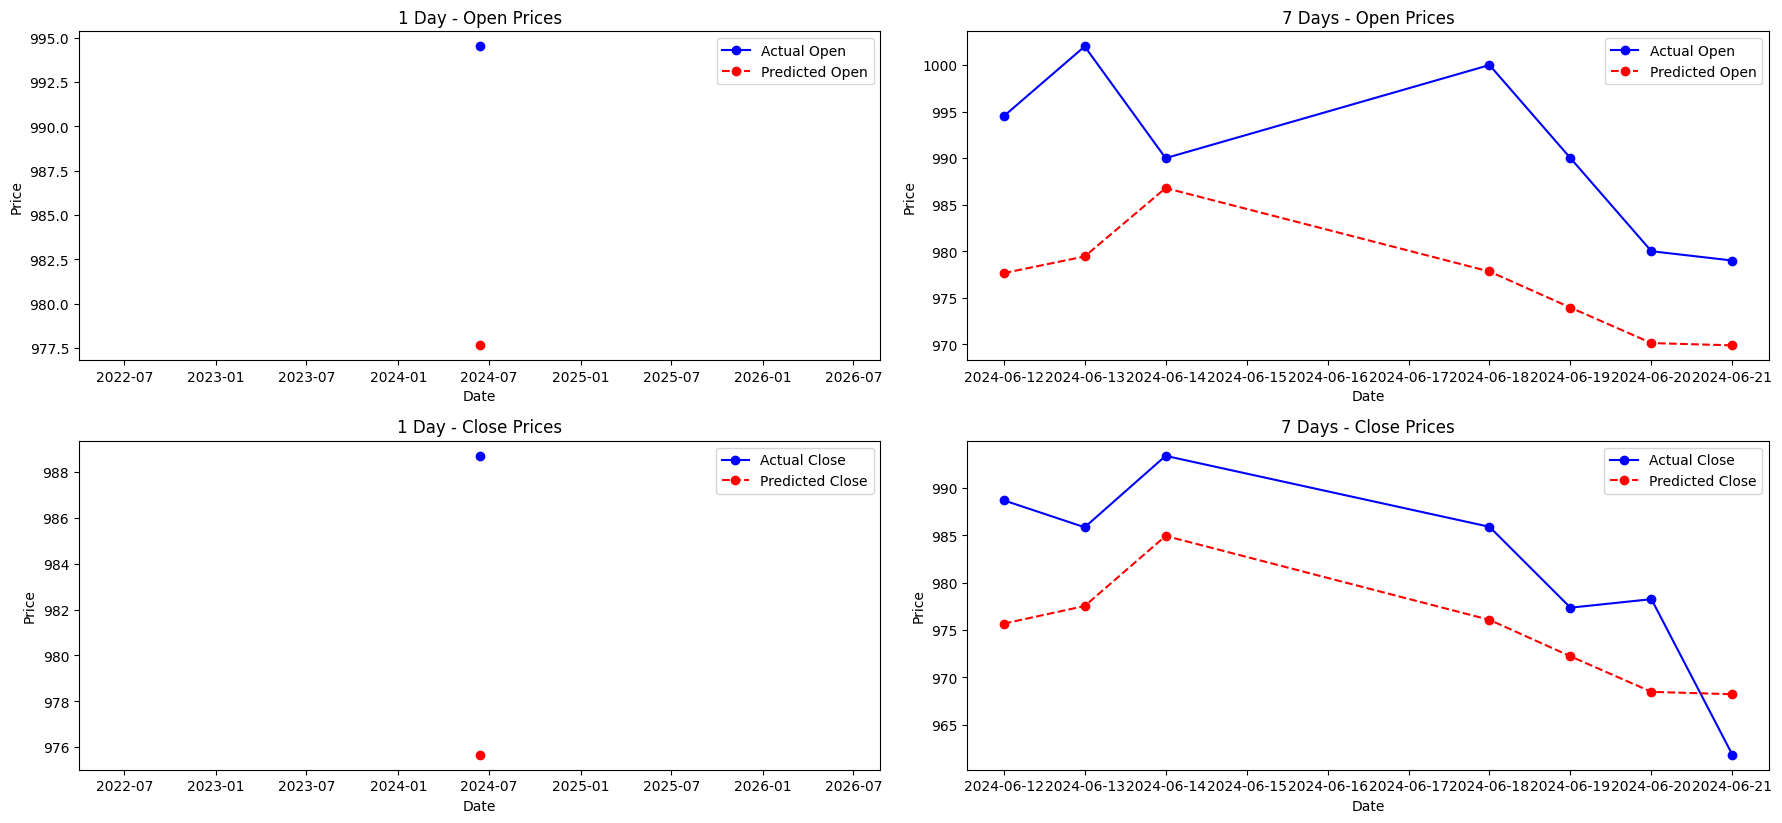

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already created the combined DataFrames as per your previous code

# Plotting the data
plt.figure(figsize=(18, 12))  # Adjust figure size as needed

# Plot for Open prices for 1 day and 7 days
plt.subplot(3, 2, 1)
plt.plot(combined_df_open.index[:1], combined_df_open['Open'][:1], marker='o', linestyle='-', color='b', label='Actual Open')
plt.plot(combined_df_open.index[:1], combined_df_open['Predicted_Open'][:1], marker='o', linestyle='--', color='r', label='Predicted Open')
plt.title('1 Day - Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(combined_df_open.index[:7], combined_df_open['Open'][:7], marker='o', linestyle='-', color='b', label='Actual Open')
plt.plot(combined_df_open.index[:7], combined_df_open['Predicted_Open'][:7], marker='o', linestyle='--', color='r', label='Predicted Open')
plt.title('7 Days - Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot for Close prices for 1 day and 7 days
plt.subplot(3, 2, 3)
plt.plot(combined_df_close.index[:1], combined_df_close['Open'][:1], marker='o', linestyle='-', color='b', label='Actual Close')
plt.plot(combined_df_close.index[:1], combined_df_close['Predicted_Open'][:1], marker='o', linestyle='--', color='r', label='Predicted Close')
plt.title('1 Day - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(combined_df_close.index[:7], combined_df_close['Open'][:7], marker='o', linestyle='-', color='b', label='Actual Close')
plt.plot(combined_df_close.index[:7], combined_df_close['Predicted_Open'][:7], marker='o', linestyle='--', color='r', label='Predicted Close')
plt.title('7 Days - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
